In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, roc_curve, auc

In [2]:
# Cargamos dataset
data_raw = pd.read_csv('data.csv')
# Creamos copia para manipular
data = data_raw.copy()

# Analisis exploratorio

In [16]:
# Analizamos registros
data.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [3]:
# Analizamos columnas y tipo de datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [22]:
# Analisis estadistico
data.describe()

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

In [4]:
# Quitamos columnas sin uso
data.drop(columns = ['id', 'Unnamed: 32'], inplace = True)
# Cambiamos a 1 los malignos y a 0 los benignos
data['diagnosis'] = np.where(data['diagnosis'] == 'M', 1, 0)

In [5]:
# Data no balanceada
data.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

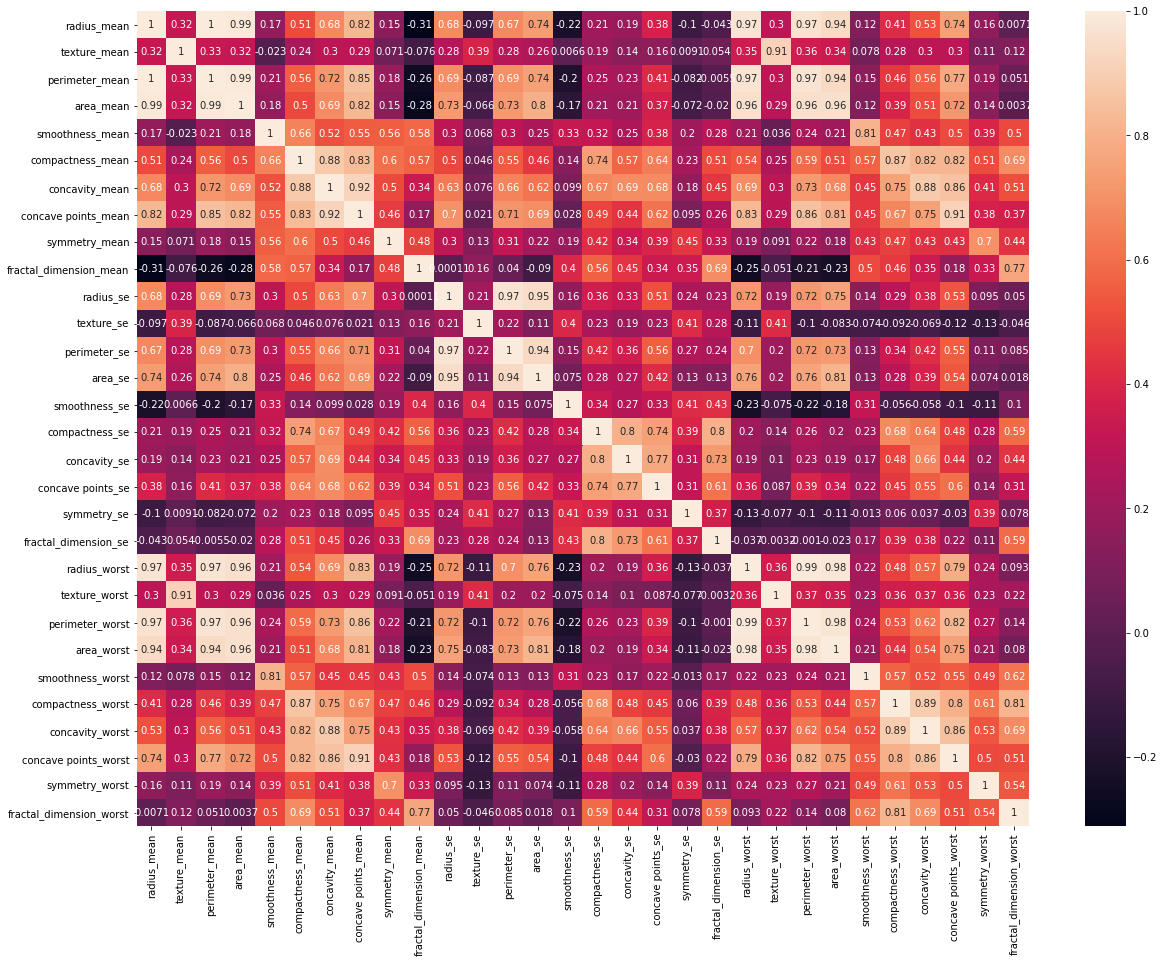

In [130]:
#Vemos corelaciones 
corr_matrix = data.drop(columns = 'diagnosis').corr()
plt.subplots(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True);

In [139]:
# Quitamos colinealidad
triangulo_sup = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape),
                                                1).astype(np.bool))
borrar = [column for column in triangulo_sup.columns
          if any(triangulo_sup[column] >= .975)]

data_no_corr = data.drop(columns = borrar)

In [144]:
#Definimos variables dependientes e independientes
X = data.drop(columns = 'diagnosis')
X_no_corr = data_no_corr.drop(columns = 'diagnosis')
y = data['diagnosis']
#Separamos dataset
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=261)

X_train_no_corr, X_test_no_corr, y_train_no_corr, y_test_no_corr = train_test_split(X_no_corr, y,
                                                    test_size=0.3, 
                                                    shuffle=True, 
                                                    random_state=261)

# Arbol de decision

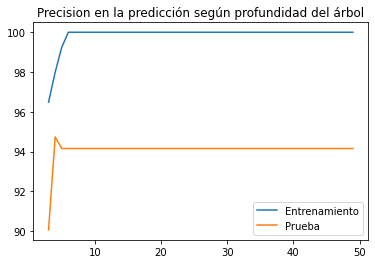

In [9]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
precision_train={}
precision_test = {}

for p in range(3,50):
  #Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", # quite min_samples_split = 2, 
                               random_state = 0).fit(X_train, y_train)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train)
    precision_train[p] = accuracy_score(y_train, y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test)
    precision_test[p] = accuracy_score(y_test, y_pred_test[p])*100

precision = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision.plot.line(
    title ='Precision en la predicción según profundidad del árbol')
plt.show()

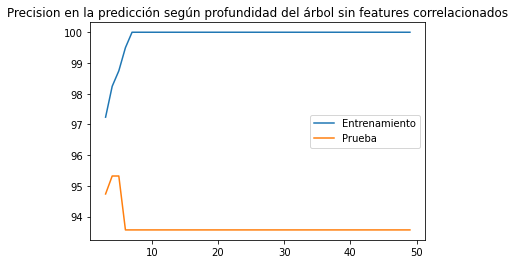

In [159]:
#Entrenamiento y prueba del modelo con distintos niveles de profunidad

clf = {}
y_pred_train = {}
y_pred_test = {}
precision_train={}
precision_test = {}

for p in range(3,50):
  #Entrenamiento del modelo
    clf[p] = DecisionTreeClassifier(max_depth = p,
                               criterion = "entropy", # quite min_samples_split = 2, 
                               random_state = 0).fit(X_train_no_corr, y_train_no_corr)                        

  #Predicción y evaluación sobre el conjunto de entrenamiento
    y_pred_train[p] = clf[p].predict(X_train_no_corr)
    precision_train[p] = accuracy_score(y_train_no_corr, y_pred_train[p])*100

  #Predicción y evaluación sobre el conjunto de prueba
    y_pred_test[p] = clf[p].predict(X_test_no_corr)
    precision_test[p] = accuracy_score(y_test_no_corr, y_pred_test[p])*100

precision_no_corr = pd.DataFrame( {'Entrenamiento':precision_train,
                           'Prueba': precision_test})

precision_no_corr.plot.line(
    title ='Precision en la predicción según profundidad del árbol sin features correlacionados')
plt.show()

In [151]:
precision[precision['Prueba']==precision['Prueba'].max()]

Entrenamiento     Prueba
4       97.98995  94.736842

In [152]:
precision_no_corr[precision_no_corr['Prueba']==precision_no_corr['Prueba'].max()]

Entrenamiento     Prueba
4      98.241206  95.321637
5      98.743719  95.321637

In [153]:
#Entrenamiento del modelo con CV
tree_model = DecisionTreeClassifier(max_depth=4,
                                      criterion="entropy", 
                                      random_state=0)

cv_tree = cross_validate(tree_model, X, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_tree['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_tree['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 98.46%
Precisión conjunto de prueba: 94.03% 



In [158]:
#Entrenamiento del modelo con CV sin features correlacionadas
tree_model = DecisionTreeClassifier(max_depth=4,
                                      criterion="entropy", 
                                      random_state=0)

cv_tree = cross_validate(tree_model, X_no_corr, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_tree['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_tree['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 98.51%
Precisión conjunto de prueba: 93.32% 



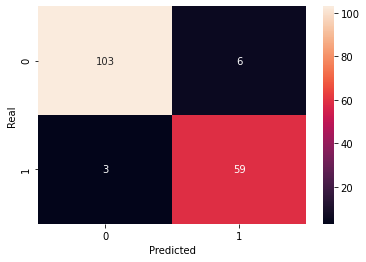

In [102]:
tree_model.fit(X_train, y_train)
y_pred_test = tree_model.predict(X_test)
data_pred = {'y_Real':  y_test,
        'y_Prediccion': y_pred_test
        }

df = pd.DataFrame(data_pred, columns=['y_Real','y_Prediccion'])
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()


In [162]:
y_test.value_counts()

0    109
1     62
Name: diagnosis, dtype: int64

# Conclusiones arboles de decision:
- El nivel optimo es en cuatro ramas, aqui se maximiza el accuracy del test sin hacer mucho overfit
- El modelo no mejora al quitar features con alta colinealidad en el score de test


# Regresion logistica

In [110]:
# Definimos modelos
lr=LogisticRegression(max_iter=10000)
lr_lasso=LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')
# Lasso no mejora por que no hay muchas features
lr.fit(X_train,y_train)
lr_lasso.fit(X_train,y_train)
pred_lr=lr.predict(X_test)
pred_lr_lasso=lr_lasso.predict(X_test)
score_1=accuracy_score(y_test,pred_1)
score_1_lasso=accuracy_score(y_test,pred_1_lasso)

In [177]:
lr_no=LogisticRegression(max_iter=100000, penalty='none', solver='sag')

In [178]:
#Entrenamiento del modelo logistico con CV
cv_lr = cross_validate(lr_no, X, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_lr['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_lr['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 92.49%
Precisión conjunto de prueba: 92.27% 



In [111]:
#Entrenamiento del modelo logistico con CV
cv_lr = cross_validate(lr, X, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_lr['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_lr['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 96.09%
Precisión conjunto de prueba: 95.26% 



In [142]:
#Entrenamiento del modelo logistico con CV sin features correlacionadas

cv_lr = cross_validate(lr, X_no_corr, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_lr['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_lr['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 95.91%
Precisión conjunto de prueba: 95.26% 



In [112]:
#Entrenamiento del modelo logistico con lasso con CV

cv_lr_lasso = cross_validate(lr_lasso, X, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_lr_lasso['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_lr_lasso['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 96.18%
Precisión conjunto de prueba: 95.26% 



In [143]:
#Entrenamiento del modelo logistico con lasso con CV

cv_lr_lasso = cross_validate(lr_lasso, X_no_corr, y, return_train_score = True)

# scores del conjunto de entrenamiento
y_train_scores = cv_lr_lasso['train_score'].mean()
print("Precisión promedio de conjuntos de entrenamiento: {:4.2f}%".format(y_train_scores*100))

#Predicción y evaluación sobre el conjunto de prueba
y_test_scores = cv_lr_lasso['test_score'].mean()
print("Precisión conjunto de prueba: {:4.2f}%".format(y_test_scores*100),'\n')

Precisión promedio de conjuntos de entrenamiento: 96.27%
Precisión conjunto de prueba: 95.26% 



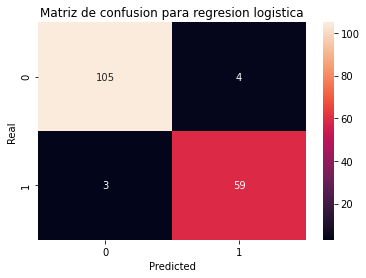

In [117]:
data_pred = {'y_Real':  y_test,
        'y_Prediccion': pred_lr
        }

df = pd.DataFrame(data_pred, columns=['y_Real','y_Prediccion'])
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Matriz de confusion para regresion logistica')
plt.show()


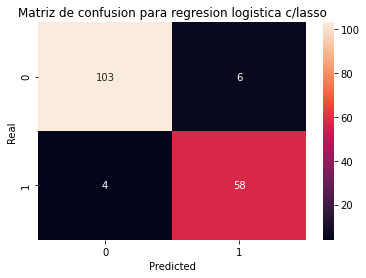

In [118]:
data_pred = {'y_Real':  y_test,
        'y_Prediccion': pred_lr_lasso
        }

df = pd.DataFrame(data_pred, columns=['y_Real','y_Prediccion'])
confusion_matrix = pd.crosstab(df['y_Real'], df['y_Prediccion'], rownames=['Real'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.title('Matriz de confusion para regresion logistica c/lasso')
plt.show()


# Conclusiones regresion logistica
- Funciona mejor con regularizacion l2 / Ridge
- Quitar colinealidad no mejora

# Conclusiones generales
- Funciona mejor la regresion logistica con Ridge (La biblioteca usada penaliza con Ridge por default)
    - El score es ligeramente mas alto
    - La diferencia de scores entre train y test es menor (mejor  generalizacion)
    - No hay suficiente dimensionalidad para mejorar con Lasso
- En ningun caso ayudo la disminucion de features correlacionadas
- El árbol tiende a hacer un poco mas de overfit, por que los datos son separables mas facilmente por una "linea" y no por "sectores"

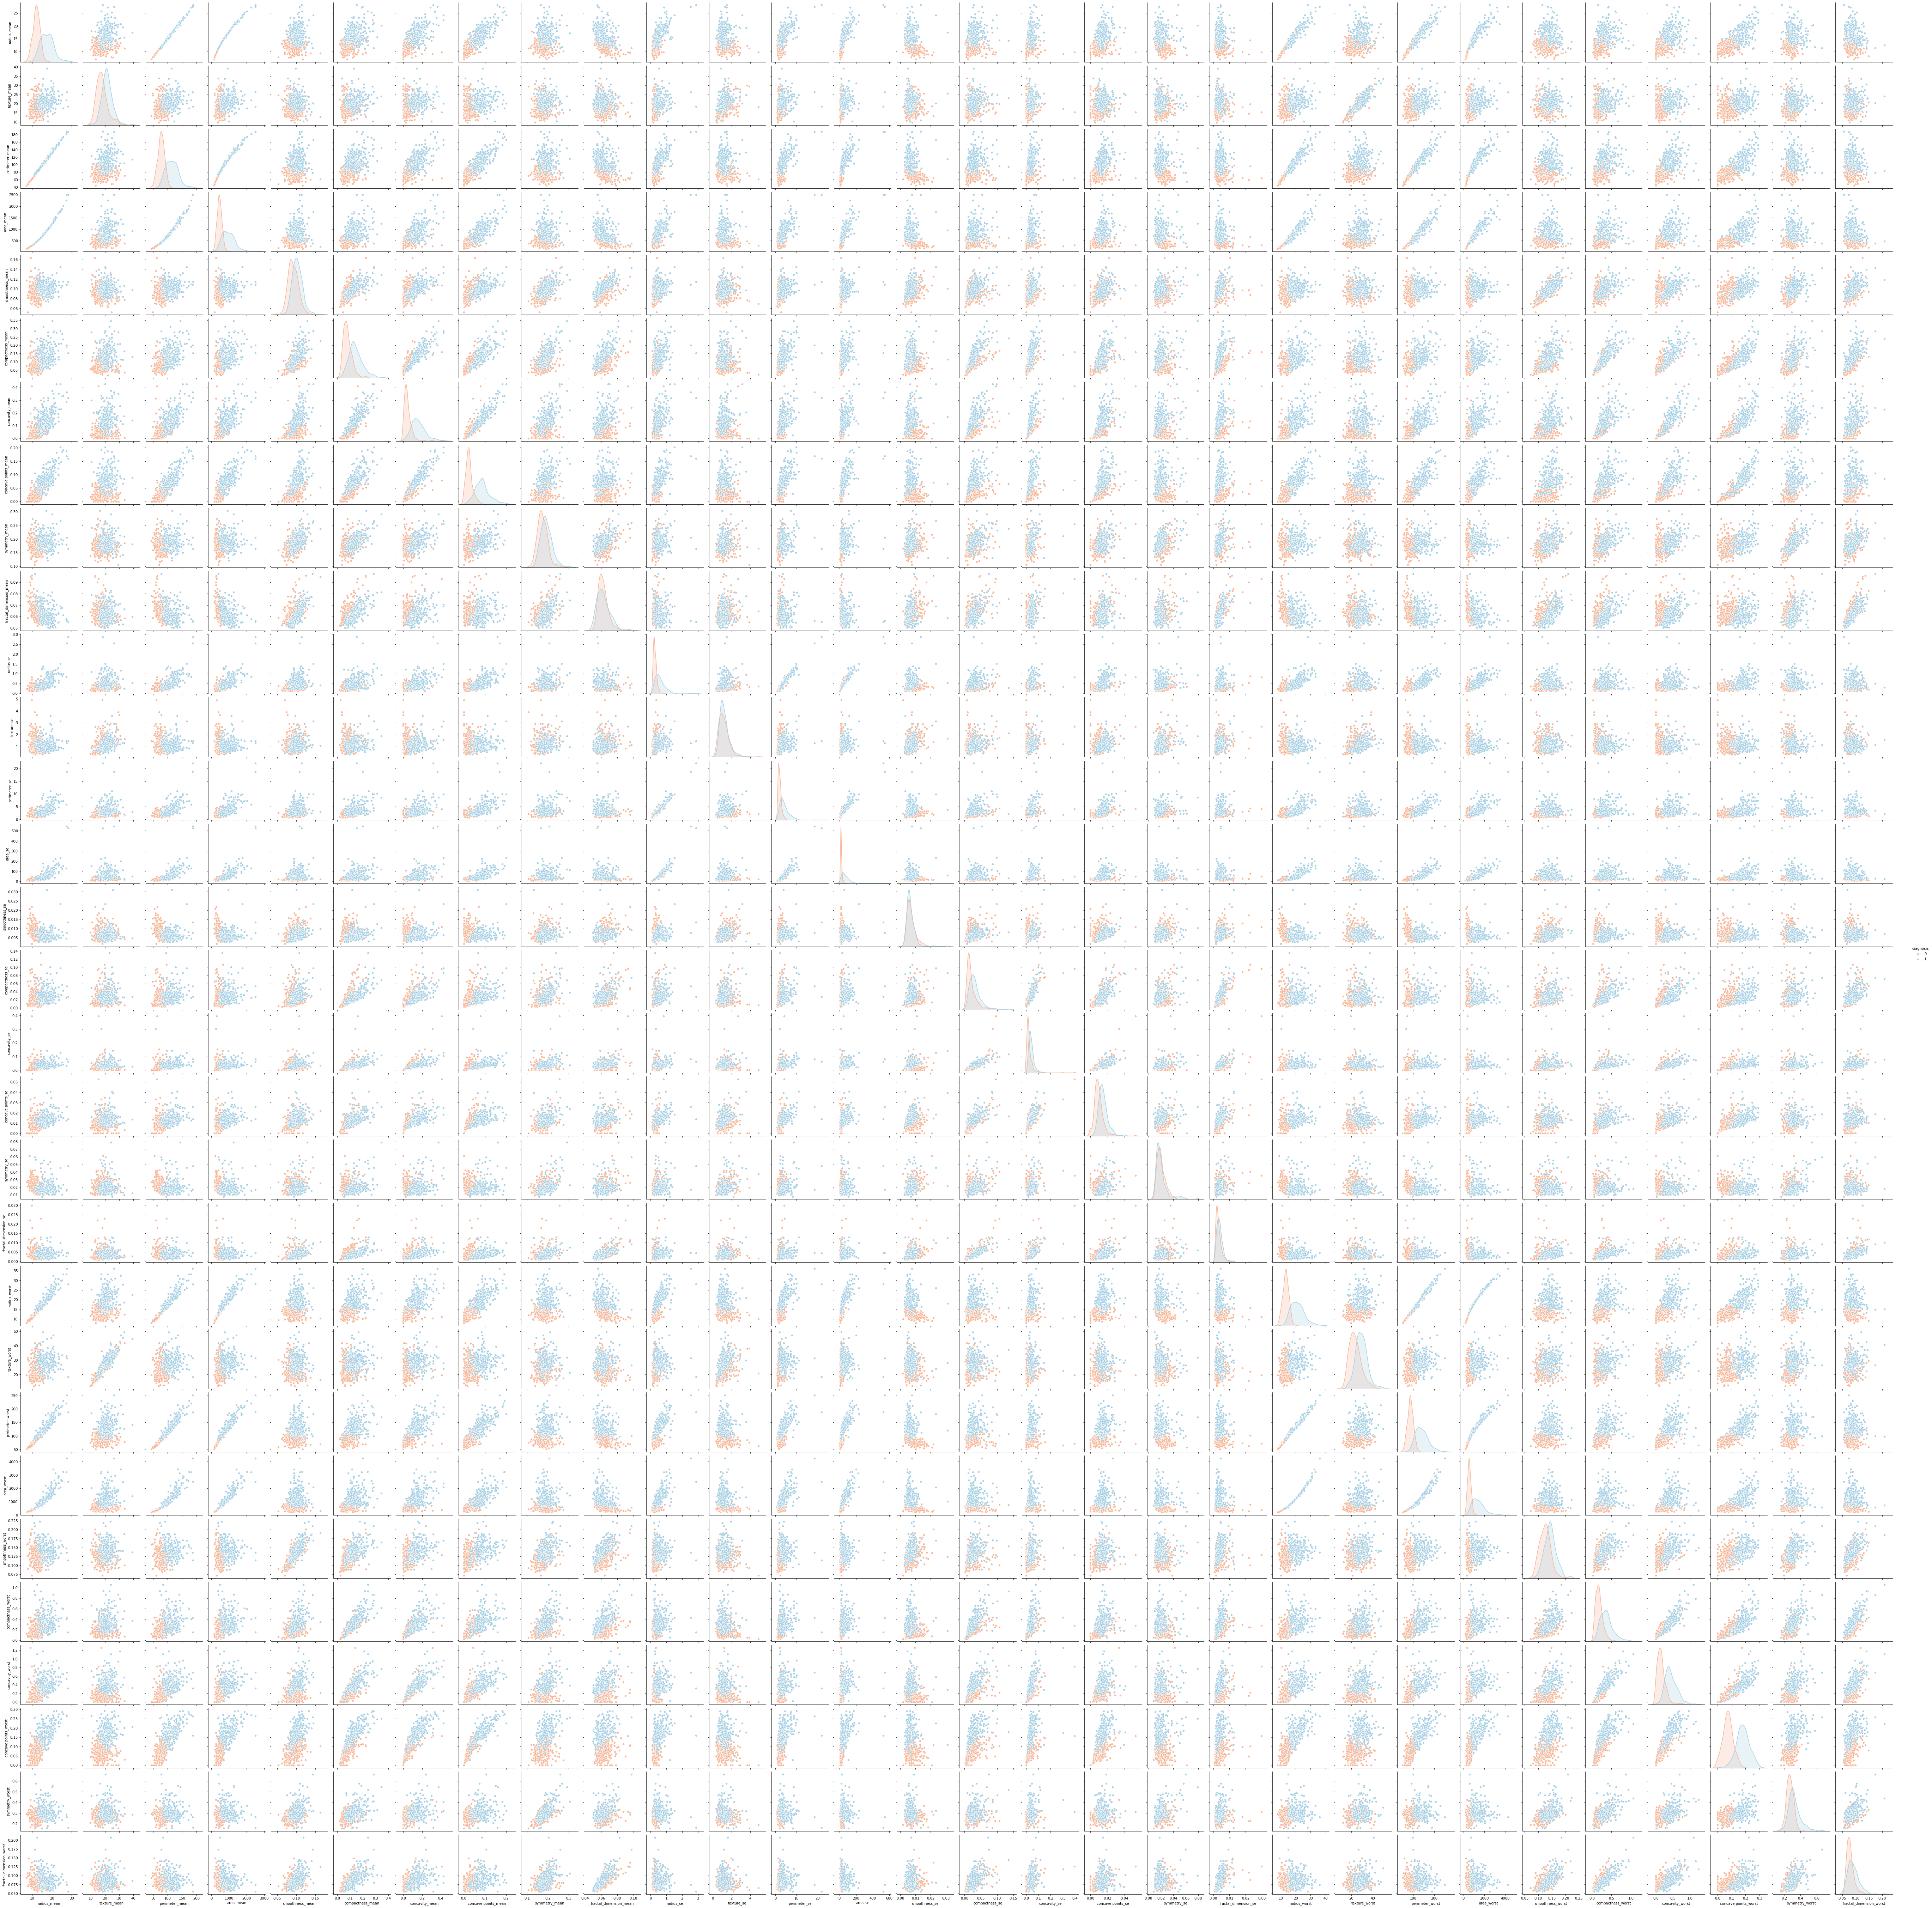

In [24]:
sns.pairplot(data=data, hue='diagnosis', palette='RdBu')